### Data Distributions

Created by Raghu Srinivas, contact rsrinivas@smu.edu for any errors or questions.



In this notebook, we will cover different types of data distributions in the context of an example. We will discuss the following distribution types with examples. 

1. Normal Distributions
2. Poisson Distributions

In [9]:
from scipy.stats import poisson,expon,norm
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset 

For this exercise, we will use a psuedo-realistic EcommerceDB dataset, designed as a part of SMU DS 7330(Database Management).
The data consists of 2 files 

1. Ecommerce_orders.csv : which contains a list of orders with their corresponding details (aka OrderNumber,CustomerID,OrderTotals and OrderDate)
2. OrdersEachWeek.csv : which contains the number of days between each consective orders for each customer


We will attempt to answer the following questions from the data as we learn about the distributions. 

Question 1: Given the orders, what is the probability of an Order Having total < \$5000

Question 2: Given the average orders placed by a customer each week, what is the probability that the customer places X orders this week? 

Lets start with loading the 2 datasets using Pandas

In [10]:
dfOrders = pd.read_csv("data/Ecommerce_orders.csv",delimiter=",")

#Drop the NaNs from the dataset
dfOrders.dropna(inplace=True)

print("Shape of the dataframe ",dfOrders.shape)

print("\n\nSome sample records from the dataframe : ")
dfOrders.head(2)


Shape of the dataframe  (1000, 4)


Some sample records from the dataframe : 


,OrderNumber,CustomerID,OrderTotal,OrderDate
0,1,96,2011,12/22/17
1,2,44,9602,02/04/17


OKay, now we analyzee the OrderTotal column. Let us first describe the columns

In [11]:
dfOrders.OrderTotal.describe()

count     1000.000000
mean      5899.279000
std       3341.391232
min        210.000000
25%       3145.000000
50%       5957.000000
75%       8183.250000
max      16456.000000
Name: OrderTotal, dtype: float64

The column is continous, with values ranging from 210 to 16k.Lets check if this follows a normal distribution by plotting a histogram.

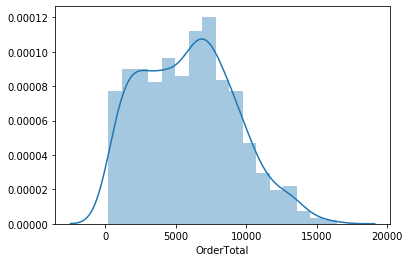

In [12]:
fig, ax = plt.subplots()
sns.distplot(dfOrders['OrderTotal'], kde=True)
plt.show()

Real data is often messy and does not exactly follow normal distribution. But we will take refuge under central limit theorm, and calculate the sample means to establish normality. We are able to, because the data is continous and the sample size is large.

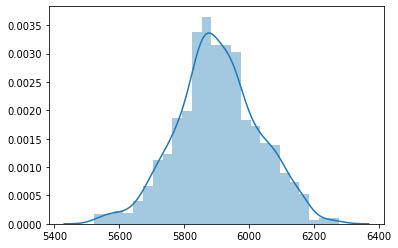

In [13]:
## Calculate sample means
sample_means = list()
for i in range(1000):
    sample_means.append(dfOrders.sample(400).OrderTotal.mean())


fig, ax = plt.subplots()
sns.distplot(sample_means, kde=True)
plt.show()

The plot, constructed from sample means resembles a normal distribution. We will proceed with that assumption and generate a normal distribution from the parameters of the OrderTotal(mean=5899.27, stddev = 3341.39) 

Approximated Normal Distribution derived from OrderTotal


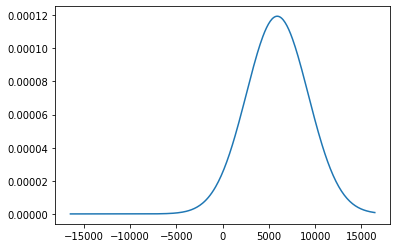

In [14]:
## We use scipy.norm to generate normal distribution from the OrderTotals & visually inspect it. 

approx_norm_dist = norm(loc=dfOrders.OrderTotal.mean(),scale=dfOrders.OrderTotal.std())

x_range = [value for value in range(-dfOrders.OrderTotal.max(),dfOrders.OrderTotal.max(),100)]
y_probs = [approx_norm_dist.pdf(value) for value in x_range] 

print("Approximated Normal Distribution derived from OrderTotal")
plt.plot(x_range,y_probs)

The above plot is an approximate normal distribution derived from the OrderTotals column. This plot is called the probability distribution and it is defined by the formula :

![image info](data/pdf_norm.png)


We can use the above formula to determine the probability of ordertotal being a certain value.

E.g. Prob of OrderTotal = 6000 given Mu=5800, Std=3341 ==> F(6000)

We now run some estimations on the approximate normal distribution and compare with the original data. 

##### Question : What is the probability that the order total is less than 5000

We will first verify this using the original data. For this, we calc the propotion of the totals less than 5000

In [15]:
Num_total_less_3500 = dfOrders[dfOrders.OrderTotal<=5000].shape[0]
Total_Num_Records = dfOrders.shape[0]

print("Results from analyzing the original data:")
print("Percentage of Orders with total less than 5000 : %.2f%%"%(Num_total_less_3500*100/Total_Num_Records))

Results from analyzing the original data:
Percentage of Orders with total less than 5000 : 41.70%


We will now use our approximate normal distribution to find the prob of the ordertoal less than 5000.
We will use the CDF (Cumulative Distribution Function to calc this)

In [16]:
print("Results derived from the prob distribution constructed from the data:")
print("Percentage of Orders with total less than 5000 : %.2f%%"%(approx_norm_dist.cdf(5000)*100))

Results derived from the prob distribution constructed from the data:
Percentage of Orders with total less than 5000 : 39.39%


###### Note :  

We used approx_norm_dist.cdf (Cumulative Distribution Function) above to calc Prob of OrderTotal less than 5000. 
We will use approx_norm_dist.pdf (Prob Distribution Function) if we need to calc the Prob of OrderTotal exactly = 5000

In summary, we notice that the results are not exact but in the ballpark. Typically this deviation is acceptable and usually deemed as statistically insignificant. The prob distribution of the data is a very powerful techique that is used in various higher order applications. 

##### Question : Can we build an estimation of the number of order in a week for the customers. Specifically, given the historical order patterns, what is the probability that Customer 1 will place X order this week?

For this question, we will load the data that contains the number of orders each week for CustomerID = 1

In [17]:
dfDays = pd.read_csv("data/OrdersEachWeek.csv")
dfDays.dropna(inplace=True)
dfDays = dfDays[dfDays.CustID==1]
print("Avg Orders per week for Cust 1 : %d Orders"%dfDays.OrdersPerWeek.mean())

Avg Orders per week for Cust 1 : 4 Orders


We will first plot the data and verify its distribution. 

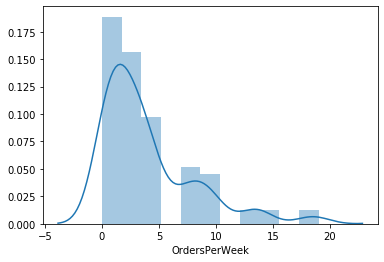

In [18]:
fig, ax = plt.subplots()
sns.distplot(dfDays.OrdersPerWeek, kde=True)
plt.show()

We notice that the data is NOT continous, infact the num of orders/week are descrete rather than continous. Can we assume this to be a continous normal distribution?

Alternately, we can use the Poisson Distribution. Poisson distributions are used when the variable of interest is a discrete count variable. This is used when we count the variable of interest for a given internal. In our case, we are counting the number of orders and the interval being the weeks. 


We use scipy.poisson for modeling the poisson distribution.  The Probability Mass Function of a poisson distribution is given by the equation : 

![image info](data/pmf_poisson.png)


where $\lambda$ indicates the average number of events in the given time interval. 

In [19]:
approx_poisson_days = poisson(dfDays.OrdersPerWeek.mean())

print("The Average Num of Orders per week from historical data: %d Orders"%dfDays.OrdersPerWeek.mean())

The Average Num of Orders per week from historical data: 4 Orders


In [20]:
##### Question : What is the probability the customer places an 6 orders this week?

Can we derive this from the original data?

If we use the data, we see that the customer has NOT placed an order on Day 6, but placed before or after 6 days.

In [21]:
print("Num of times customer placed < 6 orders  : %d"%dfDays[dfDays.OrdersPerWeek<6].shape[0])
print("Num of times customer placed exactly 6 Orders: %d "%dfDays[dfDays.OrdersPerWeek==6].shape[0])
print("Num of times customer placed > 6 Orders : %d "%dfDays[dfDays.OrdersPerWeek>6].shape[0])

Num of times customer placed < 6 orders  : 68
Num of times customer placed exactly 6 Orders: 0 
Num of times customer placed > 6 Orders : 21 


However, if we model the data as a poisson distribution, we can estimate the probability of the customer placing 6 Orders

In [22]:

print("Probability that the customer will place exactly 6 Orders: %.2f "%(approx_poisson_days.pmf(6)))

Probability that the customer will place exactly 6 Orders: 0.10 


We use the Cumulative Distribution for the probability that the customer will place more than 4 orders this week

In [23]:
print("Probability that the customer will place > 4 Orders this week : %.2f "%(1 -approx_poisson_days.cdf(4)))

Probability that the customer will place > 4 Orders this week : 0.37 
